In [1]:
import pickle
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pandas as pd

In [2]:
with open('./data/test.pkl', 'rb') as f:
    test_data = pickle.load(f)

In [3]:
test_data=np.array(test_data)
test_x=test_data[:,0]
test_y=test_data[:,1]


In [4]:
with open('./data/train.pkl', 'rb') as f2:
    train_data = pickle.load(f2)

In [5]:
train_data = np.array(train_data)
np.random.shuffle(train_data)
models = np.array_split(train_data, 10)
train_x=[]
train_y=[]
for model_num in range(10):
    train_x.append(models[model_num][:, 0])
    train_y.append(models[model_num][:, 1])
train_x =np.array(train_x)
train_y=np.array(train_y)
bias=[]
vari=[]
err=[]
ierr=[]

In [6]:
# outputs
output=[]
#loop through degrees
for degree in range(1,21):
    # loop through models
    output.append([])
    for i in range(10):
        x_train = PolynomialFeatures(degree=degree).fit_transform(train_x[i].reshape(-1,1))
        x_test = PolynomialFeatures(degree=degree).fit_transform(test_x.reshape(-1,1))
        curr_model = LinearRegression().fit(x_train,train_y[i])
        output[degree-1].append(curr_model.predict(x_test))

In [7]:
def bias_var():
    global bias
    global vari
    global err
    bias=[]
    vari=[]
    err=[]
    ierr=[]
    for degree in range(1,21):
        output_curr_degree= output[degree-1]
        output_curr_degree=np.array(output_curr_degree)
        mean_point_over_10 = np.mean(output_curr_degree, axis = 0)
        bias.append(np.mean((mean_point_over_10 - test_y)))
        var_point_over_10 = np.var(output_curr_degree, axis = 0)
        vari.append(np.mean(var_point_over_10))
        err_a= np.array(output_curr_degree)-np.array(test_y)
        err_a=np.square(err_a)
        err_mean = np.mean(err_a, axis=0)
        #ierr.append(np.mean(err_mean - (mean_point_over_10 - test_y)**2 - var_point_over_10))
        err.append(np.mean(err_mean))
        ierr.append(err[degree-1] - (bias[degree-1]**2) - vari[degree-1])
        
    table = pd.DataFrame({"Degree":np.array(range(1,21)),"Bias square": bias,"Variance": vari, "Mean Squared Error": err, "Irreducible Error": ierr})
    print(table.to_string(index=False))
    return table
        
    
    
    

In [8]:
table = bias_var()

 Degree  Bias square      Variance  Mean Squared Error  Irreducible Error
      1   232.316081  19264.229496        1.022464e+06      949228.702776
      2   229.153710  44618.051992        1.001482e+06      904352.562565
      3   -12.108891  60339.700383        6.877610e+04        8289.778370
      4    -6.020042  91599.918086        1.002120e+05        8575.804527
      5    -4.530214 119495.341063        1.268187e+05        7302.819081
      6    -3.940423 143027.133887        1.501833e+05        7140.627806
      7    -0.007813 155858.282542        1.633856e+05        7527.314159
      8    -2.202517 177988.937421        1.854681e+05        7474.270732
      9    -2.836502 217466.230953        2.247945e+05        7320.240442
     10    -1.423161 186501.864718        1.947219e+05        8218.054693
     11    -4.527756 235978.739748        2.436897e+05        7690.493330
     12     1.442792 208958.807084        2.261342e+05       17173.321767
     13   -11.698612 234107.474917    

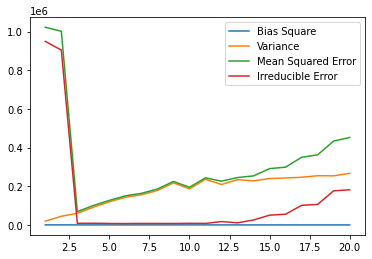

In [9]:
import matplotlib.pyplot as plt
plt.plot(np.array(range(1,21)),table["Bias square"].tolist(),label="Bias Square")
plt.plot(np.array(range(1,21)),table["Variance"].tolist(),label="Variance")
plt.plot(np.array(range(1,21)),table["Mean Squared Error"].tolist(), label="Mean Squared Error")
plt.plot(np.array(range(1,21)),table["Irreducible Error"].tolist(), label="Irreducible Error")
plt.legend()
plt.show()